In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [2]:
# Importing unnormalized data from pre-processing
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_stroke")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_stroke")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_stroke")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_stroke")
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,36117020301,6.590529,40.079115,0.193800,19.842445,0.236883,18.290989,0.311697,0.023549,0.131229,0.701755,0.121547
1,26125183800,9.415786,43.539982,0.629246,28.812162,0.366447,1042.671718,0.738423,0.061842,0.579550,2.309250,0.005598
2,8014031000,8.486452,54.726449,0.622794,29.299062,0.402534,96.914822,0.003014,0.066266,0.312800,0.524197,0.001925
3,37197050200,8.025847,43.297484,0.163819,28.821971,0.381622,0.000000,0.303514,0.136017,0.099042,0.116172,0.000352
4,55079014100,7.442152,44.024854,0.830464,25.793570,0.378853,4851.359020,0.464658,0.057822,2.545329,12.099152,0.000224


In [3]:
# Getting rid of extra column
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract",inplace=True)

print(X_test.shape, X_train.shape)

(18081, 11) (54242, 11)


In [4]:
print(y_test.shape, y_train.shape)
y_test.head()

(18081, 2) (54242, 2)


,CensusTract,Stroke_prevalence
0,6065042619,2.0
1,8013012904,1.9
2,12071010203,2.4
3,21073070800,2.7
4,24021750504,2.7


In [5]:
# Putting y into correct shape for models
y_test.set_index("CensusTract", inplace=True)
y_train.set_index("CensusTract", inplace=True)
y_test = np.array(y_test)
y_train = np.array(y_train)
y_test = y_test.reshape(18081,)
y_train = y_train.reshape(54242,)

print(y_train.shape, y_test.shape)


(54242,) (18081,)


In [6]:
X_test.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
6065042619,10.765256,68.381695,0.302713,33.267074,0.455857,71.036607,0.010866,0.105405,0.279461,0.734895,0.000000
8013012904,7.862033,55.449752,0.412314,25.051353,0.328001,690.326879,0.005497,0.111928,0.591977,0.296105,0.067925
12071010203,7.739017,30.320465,0.479444,29.268601,0.436264,273.768426,0.000000,0.008173,0.222067,0.794663,0.000843
21073070800,8.579634,44.185562,0.232567,26.901492,0.349600,12.102676,0.207799,0.011850,0.135449,0.225735,0.135572
24021750504,8.280989,44.404772,0.827345,30.607176,0.439528,776.306662,0.019803,0.775234,1.386621,3.977120,0.000000


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random forest regressor

In [7]:
# Instantiating RandomForestRegressor with default values
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = rf.predict(X_test)

In [9]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5048338953857425
MAE: 0.5860195232564569
MSE: 0.7438575068303743
RMSE: 0.8624717426271856


### This R<sup>2</sup> score is mediocre. Tuning hyperparameters next via randomized search.

In [8]:
# Instantiating RandomForestRegressor and randomly searching for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth" :range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [10]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [11]:
rs.best_estimator_

RandomForestRegressor(max_depth=28, n_estimators=162)

In [12]:
y_pred = rs.predict(X_test)

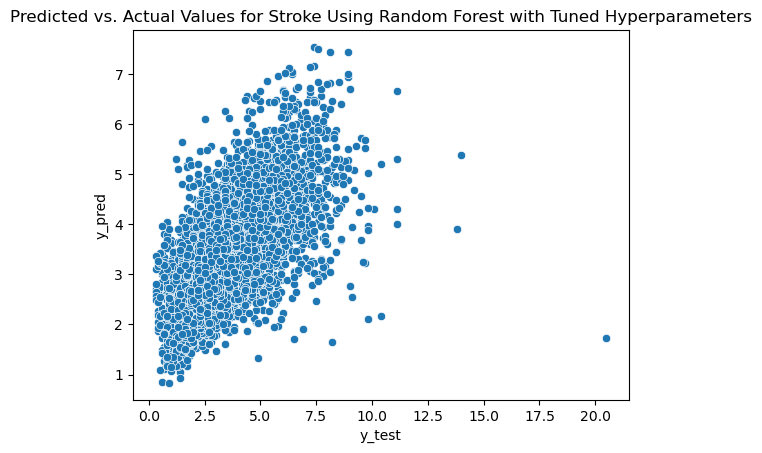

In [13]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Stroke Using Random Forest with Tuned Hyperparameters")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [14]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5058042004293324
MAE: 0.5849844175686837
MSE: 0.7423998773927698
RMSE: 0.8616262979927956


In [18]:
import pickle

pickle.dump(rf, open('stroke_best_model_rf.pkl', 'wb'))

In [7]:
# Instantiating RandomForestRegressor with default values
rf = RandomForestRegressor(max_depth=28, n_estimators=162) 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, n_estimators=162)

In [8]:
y_pred = rf.predict(X_test)

In [9]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5092477746822168
MAE: 0.5830511044739807
MSE: 0.7372268081247684
RMSE: 0.858619128673924


In [10]:
import pickle

pickle.dump(rf, open('stroke_best_model_rf.pkl', 'wb'))

### AdaBoost Regressor

In [ ]:
# Instantiating AdaBoostRegressor with default parameters
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = ada.predict(X_test)

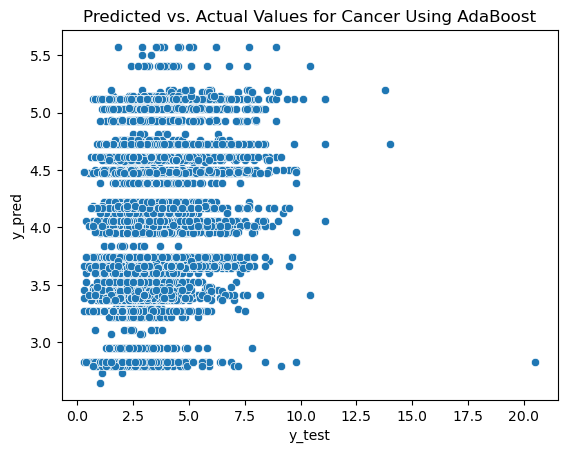

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.3004001448922893
MAE: 1.1428512420450223
MSE: 1.953510954500789
RMSE: 1.3976805623964257


### Adaboost with the default hyperparameters is not giving reasonable results.

### Now with hyperparameters tuned via randomized search.

In [ ]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [ ]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=2.001, n_estimators=411)

In [ ]:
y_pred = rs.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.6519967325513849
MAE: 1.3293558385160533
MSE: 2.481692828560816
RMSE: 1.5753389567203675


### Tuning the hyperparameters just made the model much worse. 

### GradientBoost Regressor

In [ ]:
# Instantiating GradientBoostingRegressor using default parameters
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2791523466325099
MAE: 0.7261318171823266
MSE: 1.082884981911639
RMSE: 1.040617596387664


### Now with hyperparameters tuned via randomized search.

In [ ]:
# Instantiating GradientBoostingRegressor and randomly searching for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [ ]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=37,
                          n_estimators=388)

In [ ]:
y_pred = rs.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2324810277660817
MAE: 0.7550937235067859
MSE: 1.152996426473281
RMSE: 1.0737767116459926


### The tuning did not make much of a difference, and this is still not as good as Random Forest.

### XGBoost Regressor

In [15]:
# Instantiating XGBRegressor with default parameters
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
y_pred = xgb.predict(X_test)

In [17]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.431480127858865
MAE: 0.6387142636891876
MSE: 0.8540523487646072
RMSE: 0.9241495272760828


### This is not as good as Random Forest.

### Now with hyperparameters tuned via randomized search.

In [ ]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth":range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [ ]:
rs.best_params_

{'min_child_weight': 124, 'max_depth': 138, 'gamma': 22}

In [ ]:
y_pred = rs.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.41809877908314286
MAE: 0.6450536058959258
MSE: 0.8741543239312849
RMSE: 0.9349622045469458


### LightGBM with tuned hyperparameters via randomized search.

In [ ]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_l

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [ ]:
rs.best_estimator_

LGBMRegressor(reg_alpha=4.0009999999999994, reg_lambda=59.00099999999999)

In [ ]:
y_pred = rs.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.39548172854851005
MAE: 0.6577495745895267
MSE: 0.9081305243734671
RMSE: 0.952958826169036


### This is not as good as XGBoost

In [ ]:
# Importing normalized data
X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_stroke")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_stroke")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,36117020301,6.590529,40.079115,-0.948311,-1.375191,-1.473543,-1.190986,0.187194,-0.930999,-0.944029,0.701755
1,26125183800,9.415786,43.539982,0.733176,-0.182513,-0.398763,0.812536,1.406966,-0.191432,0.300236,2.309250
2,8014031000,8.486452,54.726449,0.717026,-0.127114,-0.133286,-0.505520,-1.450109,-0.119736,-0.309579,0.524197
3,37197050200,8.025847,43.297484,-1.131184,-0.181390,-0.285513,-2.105729,0.154923,0.738397,-1.084877,0.116172
4,55079014100,7.442152,44.024854,1.160056,-0.544472,-0.305998,1.930035,0.716503,-0.258809,1.614479,12.099152


In [ ]:
# Getting rid of unneeded column
X_train_log.set_index("CensusTract", inplace=True)
X_test_log.set_index("CensusTract", inplace=True)
print(X_train_log.shape, X_test_log.shape)

(54242, 10) (18081, 10)


### Support Vector Machine Regressor with tuned hyperparameters via randomized search.

In [ ]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.
svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [ ]:
svm_rs.fit(X_train_log, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [ ]:
svm_rs.best_estimator_

SVR(C=9.01, epsilon=1.0001)

In [ ]:
svm = SVR()


svm_rs = svm(X_train, y_train, "C"=9.01, "epsilon"async=1.0001))

In [ ]:
y_pred = svm_rs.predict(X_test_log)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.14029001816208253
MAE: 0.8442794612693033
MSE: 1.2914892956684139
RMSE: 1.1364371059009002


### This is not as good as random forest.

## Random forest with default parameters gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.